# **Building an Expected Goals (xG) Model**

## **Introduction**

Expected Goals (xG) is a statistical measure used in football analytics to estimate the likelihood of a shot resulting in a goal. This project aims to build an xG model using a dataset of football events, exploring the factors that influence the probability of scoring a goal. By analyzing features such as shot location, body part used, and the type of assist, we can derive meaningful insights and construct a predictive model.

---

## **Step 1: Data Understanding and Preparation**

The first step involves loading the events dataset (`events.csv`) into a Pandas DataFrame for analysis.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
events = pd.read_csv('events.csv')
print(events.head())

     id_odsp   id_event  sort_order  time  \
0  UFot0hit/  UFot0hit1           1     2   
1  UFot0hit/  UFot0hit2           2     4   
2  UFot0hit/  UFot0hit3           3     4   
3  UFot0hit/  UFot0hit4           4     7   
4  UFot0hit/  UFot0hit5           5     7   

                                                text  event_type  event_type2  \
0  Attempt missed. Mladen Petric (Hamburg) left f...           1         12.0   
1  Corner,  Borussia Dortmund. Conceded by Dennis...           2          NaN   
2  Corner,  Borussia Dortmund. Conceded by Heiko ...           2          NaN   
3           Foul by Sven Bender (Borussia Dortmund).           3          NaN   
4  Gokhan Tore (Hamburg) wins a free kick in the ...           8          NaN   

   side         event_team           opponent  ... player_in player_out  \
0     2         Hamburg SV  Borussia Dortmund  ...       NaN        NaN   
1     1  Borussia Dortmund         Hamburg SV  ...       NaN        NaN   
2     1  Borussia

Now we need to sort the data so it only includes relevant information to xG. First we need to include only shot events. Then only include necessary columns.

In [7]:
shots = events[events['event_type'] == 1]
columns_to_keep = ['location', 'shot_place', 'shot_outcome', 'bodypart', 
                   'assist_method', 'situation', 'side']
shots = shots[columns_to_keep]
print(shots.head())

    location  shot_place  shot_outcome  bodypart  assist_method  situation  \
0        9.0         6.0           2.0       2.0              1        1.0   
11      15.0        13.0           2.0       1.0              1        1.0   
13       9.0         4.0           1.0       2.0              1        1.0   
14      15.0         2.0           3.0       1.0              0        1.0   
17      15.0         2.0           3.0       1.0              0        1.0   

    side  
0      2  
11     1  
13     1  
14     1  
17     2  


Now lets take a look at a couple graphs. One for where are most shots taken, and what is the outcome of the shots?

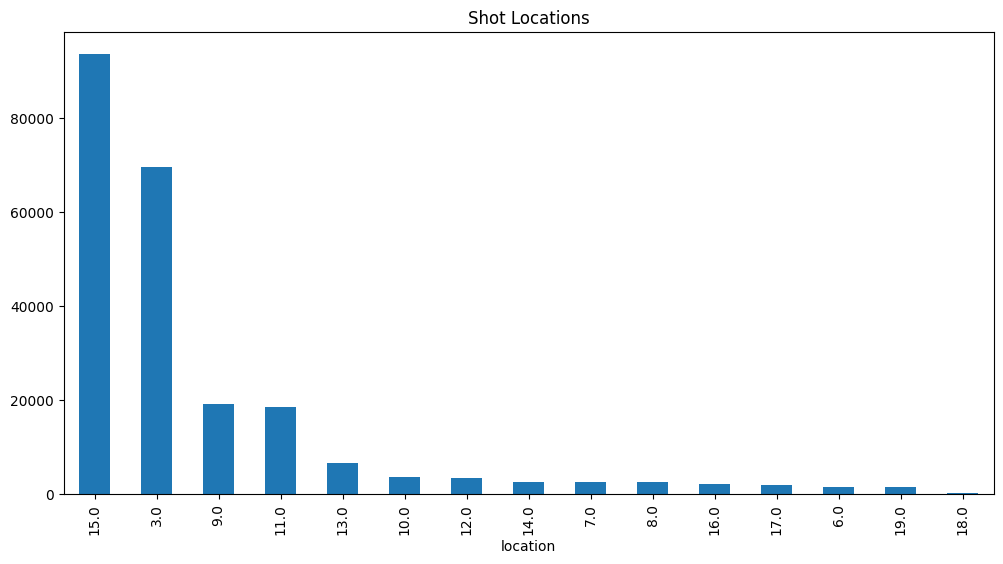

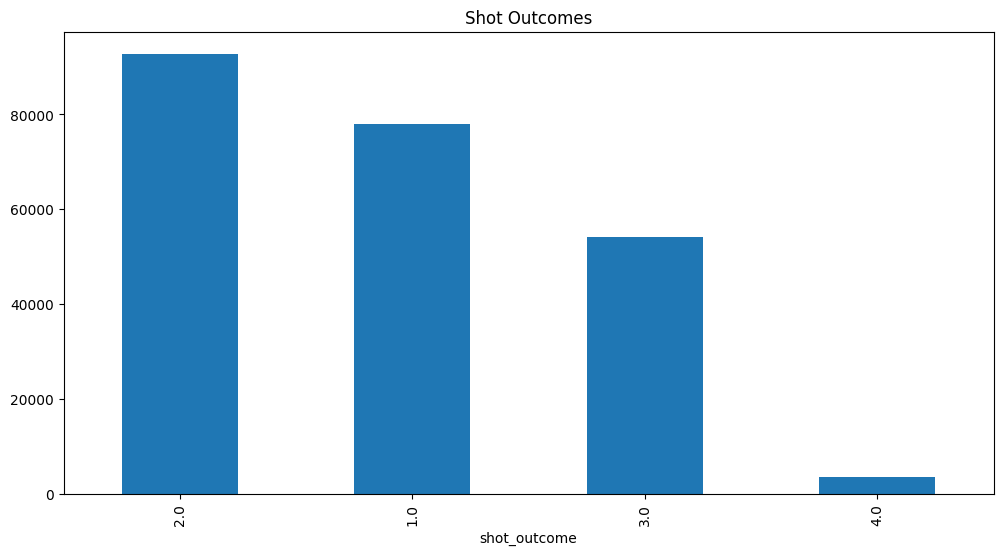

In [8]:
shots['location'].value_counts().plot(kind='bar', figsize=(12, 6), title="Shot Locations")
plt.show()

shots['shot_outcome'].value_counts().plot(kind='bar', figsize=(12, 6), title="Shot Outcomes")
plt.show()